In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import json
import os
import pandas as pd

In [2]:
predictions = []
with open("../data/queries-with-predictions.jsonl", "r") as f:
    for line in f:
        predictions.append(json.loads(line))

In [129]:
predictions_clean = []
for p in predictions:
    predictions_clean.append({
        "query": p["query"],
        "provider": p["provider"],
        "timestamp": p["timestamp"],
        "beir-webis-touche2020.avg-idf": p["qpptk_predictions"]["beir-webis-touche2020"]["avg-idf"],
        "beir-webis-touche2020.scq": p["qpptk_predictions"]["beir-webis-touche2020"]["scq"],
        "beir-webis-touche2020.clarity": p["qpptk_predictions"]["beir-webis-touche2020"]["clarity+10+100"],
        "beir-webis-touche2020.wig": p["qpptk_predictions"]["beir-webis-touche2020"]["wig+100"],
        "beir-webis-touche2020.var": p["qpptk_predictions"]["beir-webis-touche2020"]["var"],
        "msmarco-passage.avg-idf": p["qpptk_predictions"]["msmarco-passage"]["avg-idf"],
        "msmarco-passage.scq": p["qpptk_predictions"]["msmarco-passage"]["scq"],
        "msmarco-passage.clarity": p["qpptk_predictions"]["msmarco-passage"]["clarity+10+100"],
        "msmarco-passage.wig": p["qpptk_predictions"]["msmarco-passage"]["wig+100"],
        "msmarco-passage.var": p["qpptk_predictions"]["msmarco-passage"]["var"],
        "msmarco-subsample.avg-idf": p["qpptk_predictions"]["msmarco-subsample"]["avg-idf"],
        "msmarco-subsample.scq": p["qpptk_predictions"]["msmarco-subsample"]["scq"],
        "msmarco-subsample.clarity": p["qpptk_predictions"]["msmarco-subsample"]["clarity+10+100"],
        "msmarco-subsample.wig": p["qpptk_predictions"]["msmarco-subsample"]["wig+100"],
        "msmarco-subsample.var": p["qpptk_predictions"]["msmarco-subsample"]["var"],
    })
predictions_df = pd.DataFrame(predictions_clean)
predictions_df

,query,provider,timestamp,beir-webis-touche2020.avg-idf,beir-webis-touche2020.scq,beir-webis-touche2020.clarity,beir-webis-touche2020.wig,beir-webis-touche2020.var,msmarco-passage.avg-idf,msmarco-passage.scq,msmarco-passage.clarity,msmarco-passage.wig,msmarco-passage.var,msmarco-subsample.avg-idf,msmarco-subsample.scq,msmarco-subsample.clarity,msmarco-subsample.wig,msmarco-subsample.var
0,qvod x,baidu,1273139424000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
1,swine flu,baidu,1246274080000,7.211716,101.452756,7.881197,5.803774,6.949213,7.678779,146.738256,8.875381,7.071308,7.335118,8.035936,66.868794,7.598297,2.793739,3.173700
2,raise it up,baidu,1236082249000,8.202117,99.896058,6.316219,2.725910,7.180149,9.330981,186.022138,8.997405,4.100777,8.250774,7.490745,57.787904,8.727038,1.591045,1.594836
3,kodaijingling,baidu,1263374995000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
4,pageddatasource,baidu,1316030059000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18248,esor@ el het ches galu,youtube,1568963024000,9.388300,170.660498,5.694192,2.964338,11.634063,11.485169,259.841826,8.366195,3.317007,11.106953,8.430535,96.060044,5.895154,1.915790,8.581419
18249,dilafruz bekmetova,youtube,1565581294000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
18250,coda baldi,youtube,1580892007000,11.071577,69.011317,4.703654,5.554849,7.390750,10.969783,138.902420,10.298668,5.589368,8.926624,10.784520,28.804138,8.513922,5.104843,0.000000
18251,basketball world cup 2019,youtube,1575248963000,5.265329,173.666622,4.844775,3.043414,11.275479,5.805508,255.095973,5.761786,3.209189,9.274511,6.122046,133.649313,7.770007,1.650175,6.371346


In [130]:
predictions_df[["provider", "msmarco-passage.avg-idf"]].groupby("provider").mean()

,msmarco-passage.avg-idf
provider,
360,6.101174
aliexpress,6.986234
amazon,6.858440
baidu,6.871305
bing,7.530301
ebay,7.926165
github,6.932549
google,7.735181
imdb,7.964420


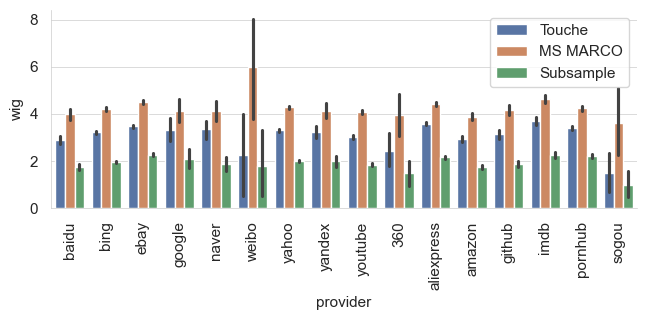

In [161]:
qpp = "wig"

df = predictions_df[["provider", f"beir-webis-touche2020.{qpp}", f"msmarco-passage.{qpp}", f"msmarco-subsample.{qpp}"]]
df = df.rename({f"beir-webis-touche2020.{qpp}":"Touche",
           f"msmarco-passage.{qpp}":"MS MARCO",
           f"msmarco-subsample.{qpp}":"Subsample",
           }, axis=1)
df = df.reset_index().set_index(["index", "provider"]).stack().reset_index()
df = df.rename({"level_2": "corpus", 0: "value"}, axis=1)

sns.set_theme(style="whitegrid")
matplotlib.rcParams["font.size"] = "8"
colwidth_pt = 452.9679
colwidth_inches = colwidth_pt / 72.27
dpi = 600

fig,ax = plt.subplots(figsize=(colwidth_inches,3))
sns.barplot(data=df, ax=ax,legend="brief", x="provider", y="value", hue="corpus")
ax.grid(linewidth=0.5, axis='y')
ax.legend(loc="best")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel(qpp)
plt.setp(ax.spines.values(), linewidth=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)
sns.despine(top=True, right=True)
ax.grid(linewidth=0.5, axis='y')
plt.tight_layout(pad=0)
plt.savefig(f'figures/{qpp}.pdf', pad_inches=0)
plt.show()

In [38]:
df

,beir-webis-touche2020.clarity,msmarco-passage.clarity,msmarco-subsample.clarity
provider,,,
360,2.930992,5.600198,2.881637
aliexpress,5.341600,7.416983,6.028425
amazon,4.271542,6.690550,4.703179
baidu,3.556569,6.281192,4.052988
bing,4.952468,7.758654,5.869373
ebay,5.454408,7.998918,6.155387
github,4.093420,6.852902,4.512886
google,5.316455,7.789491,5.946269
imdb,4.912726,7.840493,5.933384
